**Class Problem1:** Given an array of N elements. Find the number of pairs "12" such that arr[i] == 1 and arr[j] == 2 for some (i,j) pair and i < j.

arr = [3, 1, 1, 2, 3, 2]

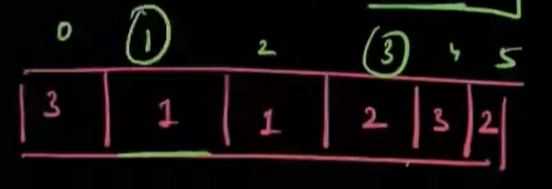

4 pairs of indices possible in the above array, (1, 3), (1, 5), (2, 3), (2, 5)

**Approach to solving the problem:** 



1.   All the elements in the array other than 1 and 2 are of no use to us
2.   Count number of 2's inside the array after the 1 being considered



In [ ]:
# Method 1 - Bruteforce Approach

def CountSequence(a):

  n = len(a)

  cnt = 0

  for i in range(n):
    if a[i] == 1:
      for j in range(i+1, n):
        if a[j] == 2:
          cnt += 1

  return cnt

arr = [3, 1, 1, 2, 3, 2]
print(CountSequence(arr))
arr = [1,2,3,1,2]
print(CountSequence(arr))

4
3


For the above problem, **T.C** -> O(N^2), **S.C** -> O(1)

In [ ]:
# Method 2 - Suffix Sum

def CountSequence(a):

  n = len(a)

  if n == 1:

    return 0 # Length of the array is 1, so there would be 0 "12" pairs

  cnt = 0

  SS = [0] * n

  for i in range(n-1, -1, -1):

    if a[i] == 2:

      cnt += 1
      SS[i] = cnt

    else:

      SS[i] = cnt

  print(f'Suffix Sum: {SS}')

  cnt = 0

  for i in range(0, n-1):

    if a[i] == 1:

      cnt += SS[i+1]

  return cnt

arr = [3, 1, 1, 2, 3, 2]
print(CountSequence(arr))
arr = [1,2,3,1,2]
print(CountSequence(arr))
arr = [1]
print(CountSequence(arr))
arr = [1,2]
print(CountSequence(arr))
arr = [2,1]
print(CountSequence(arr))

Suffix Sum: [2, 2, 2, 2, 1, 1]
4
Suffix Sum: [2, 2, 1, 1, 1]
3
0
Suffix Sum: [1, 1]
1
Suffix Sum: [1, 0]
0


For the above problem, **T.C** -> O(N), **S.C** -> O(N)

In [ ]:
# Method 3 - Carry Forward

def CountSequence(a):

  cnt_2 = 0

  for i in range(len(a)):

    if a[i] == 2:

      cnt_2 += 1

  cnt_ans = 0

  for i in range(len(a)):

    if a[i] == 1:

      cnt_ans += cnt_2

    if a[i] == 2:

      cnt_2 -= 1


  return cnt_ans

arr = [3, 1, 1, 2, 3, 2]
print(CountSequence(arr))
arr = [1,2,3,1,2]
print(CountSequence(arr))
arr = [1]
print(CountSequence(arr))
arr = [1,2]
print(CountSequence(arr))
arr = [2,1]
print(CountSequence(arr))

4
3
0
1
0


For the above problem, **T.C** -> O(N), **S.C** -> O(1)

**Concept:** 

**"Leaders in an array"** - An element is a leader if the element is strictly greater than all the elements on the right.

**Note:** Last element in an array is always a leader

**Class Problem2:** An array of N elements is given. Count the number of leaders in the array.

arr = [14, 23, -8, 9, 12, 5, 6, 3, 1]

In [ ]:
# Method 1 - Bruteforce Approach

def CountLeaders(a):

  cnt = 0

  n = len(a)

  for i in range(n):

    is_leader = True

    for j in range(i+1, n):

      if a[j] > a[i]:

        is_leader = False
        break

    if is_leader:

      cnt += 1

  return cnt


arr = [14, 23, -8, 9, 12, 5, 6, 3, 1]
print(CountLeaders(arr))

5


For the above problem, **T.C** -> O(N^2), **S.C** -> O(1)

In [ ]:
# Method 1 - Carry Forward Technique

def CountLeaders(a):

  cnt = 1

  n = len(a)

  max_ele = a[-1]

  for i in range(n-2, -1, -1):

    if a[i] > max_ele:

      max_ele = a[i]
      cnt += 1

  return cnt

arr = [14, 23, -8, 9, 12, 5, 6, 3, 1]
print(CountLeaders(arr))

5


For the above problem, **T.C** -> O(N), **S.C** -> O(1)

**Subarray:** Contiguous part of an array

arr = [1, 2, 3, 4]

For the above array,

[1] is a subarray

[1, 2] is a subarray

[1, 2, 3] is a subarray

[1, 2, 3, 4] is a subarray

[2] is a subarray

[2, 3] is a subarray

[2, 3, 4] is a subarray

[3] is a subarray

[3, 4] is a subaray

[4] is a subarray

But [1, 3] or [1, 3, 4] are not subarrays because they are not contiguous

**Class Problem2:** Given an array of N elements. Find length of the smallest subarray which contains both min and max element.

arr = [8, 7, 9, 1, 10, 2, 5, 11]

Here length of the smallest subarray is 5 i.e [1, 10, 2, 5, 11]

arr = [1, 2, 7, 3, 7, 2, 4, 1]

Here length of the smallest subarray is 3 i.e [1, 2, 7]

**Approach to solving the problem:**



1.   Find min and max of the array
2.   Iterate and try to start at every min



In [ ]:
# Method-1: Bruteforce Approach

def LengthOfSubarray(a):

  # Find max element in the array

  mx = max(a)

  # Find min element in the array

  mn = min(a)

  n = len(a)

  # Keeping max as the starting element, find the occurence of the min element on the right of the max occurence, such that length of the subarray is minimum

  ans = 999999999999

  for i in range(n):
    if a[i] == mx:
      for j in range(i, n): # Considering i and not i+1 to cover cases where mx == mn for the array
        if a[j] == mn:
          ans = min(ans, j-i+1)

  # Keeping min as the starting element, find the occurence of the max element on the right of the min occurence, such that length of the subarray is minimum

  for i in range(n):
    if a[i] == mn:
      for j in range(i, n): # Considering i and not i+1 to cover cases where mx == mn for the array
        if a[j] == mx:
          ans = min(ans, j-i+1)

  return ans

arr = [2, 2, 6, 4, 5, 1, 5, 1, 6, 4, 3, 4, 1, 3]
print(LengthOfSubarray(arr))
arr = [8, 8, 8, 8, 8, 8]
print(LengthOfSubarray(arr))

2
1


For the above problem, **T.C** -> O(N^2), **S.C** -> O(1)

In [ ]:
# Method-2: Carry Forward technique

def LengthOfSubarray(a):

  # Find max element in the array

  mx = max(a)

  # Find min element in the array

  mn = min(a)

  if mx == mn:

    return 1

  n = len(a)

  ans = len(a)

  # Keeping max as the starting element, find the occurence of the min element on the right of the max occurence, such that length of the subarray is minimum

  min_ind = 999999999999

  # Considering minimum index element is to the right of the maximum element

  for i in range(n-1, -1, -1):
    if a[i] == mx:
      ans = min(ans, min_ind-i+1)
    if a[i] == mn:
      min_ind = i

  # Considering minimum index element is to the left of the maximum element

  max_ind = 999999999999

  for i in range(n-1, -1, -1):
    if a[i] == mn:
      ans = min(ans, max_ind-i+1)
    if a[i] == mx:
      max_ind = i

  return ans

arr = [2, 2, 6, 4, 5, 1, 5, 2, 6, 4, 3, 4, 1, 3]
print(LengthOfSubarray(arr))
arr = [8, 8, 8, 8, 8, 8]
print(LengthOfSubarray(arr))

4
1


For the above problem, **T.C** -> O(N), **S.C** -> O(1)